In [232]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import MultinomialNB, CategoricalNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [178]:
data = pd.read_csv("FlightDelays.csv") #Read CSV

In [179]:
print(data) #Show data for later choosing airport cities etc.

      CRS_DEP_TIME CARRIER  DEP_TIME DEST  DISTANCE     FL_DATE  FL_NUM  \
0             1455      OH      1455  JFK       184  01/01/2004    5935   
1             1640      DH      1640  JFK       213  01/01/2004    6155   
2             1245      DH      1245  LGA       229  01/01/2004    7208   
3             1715      DH      1709  LGA       229  01/01/2004    7215   
4             1039      DH      1035  LGA       229  01/01/2004    7792   
...            ...     ...       ...  ...       ...         ...     ...   
2196           645      RU       644  EWR       199   1/31/2004    2761   
2197          1700      RU      1653  EWR       213   1/31/2004    2497   
2198          1600      RU      1558  EWR       199   1/31/2004    2361   
2199          1359      RU      1403  EWR       199   1/31/2004    2216   
2200          1730      RU      1736  EWR       199   1/31/2004    2097   

     ORIGIN  Weather  DAY_WEEK  DAY_OF_MONTH TAIL_NUM Flight Status  
0       BWI        0         

In [176]:
data.dtypes

CRS_DEP_TIME      int64
CARRIER           int64
DEP_TIME          int64
DEST              int64
DISTANCE          int64
FL_DATE          object
FL_NUM            int64
ORIGIN            int64
Weather           int64
DAY_WEEK          int64
DAY_OF_MONTH      int64
TAIL_NUM          int64
Flight Status     int64
dtype: object

In [113]:
X = data.drop(columns=['CRS_DEP_TIME', 'DEP_TIME', 'FL_DATE', 'DEP_TIME']) #setting X, y variables for algorithm. 
y = data['Flight Status'].values #set to categorical variables 

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.4, shuffle=True) #Divide data into 40% validation

In [146]:
V = CountVectorizer() #vectorizing data for MultinomialNB algorithm. Turning data from words to numeric output 
X_train_v = V.fit_transform(data.drop(columns=['CRS_DEP_TIME', 'DEP_TIME', 'FL_DATE', 'DEP_TIME']))
X_train_v.toarray()[:10]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]])

In [147]:
MNB = MultinomialNB() #calling MultinomialNB

In [148]:
MNB.fit(X_train, y_train) #train model to array data

MultinomialNB()

In [223]:
pred = MNB.predict(X_test)

In [227]:
metrics.accuracy_score(y_test, pred) #accuracy score of model

0.8365493757094211

In [160]:
print(confusion_matrix(y_test, pred)) #confusion matrix of test results

[[ 95  64]
 [ 80 642]]


In [165]:
prob = MNB.predict_proba(X_test) #setting variables for ROC chart
predx = prob[:,1]

In [166]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predx) #continuing to build on formula for chart
ra = metrics.auc(fpr, tpr)

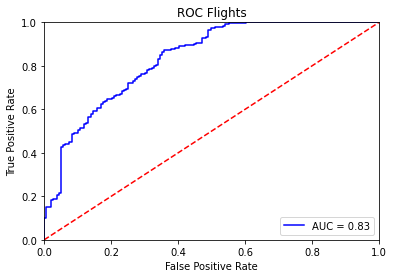

In [170]:
plt.title('ROC Flights') #create chart of above results, lableing chart for readability 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ra)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [203]:
status = pd.crosstab(index=X_train["Flight Status"],  #count table showing how many flights were delayed/ontime per airport
                            columns=X_train["ORIGIN"])

status.columns = ["DCA", "IDA", "BWI"]
status.index= ["ontime", "delayed"]

status

,DCA,IDA,BWI
ontime,26,140,103
delayed,66,690,295


In [ ]:
rows = len(index) #count rows for division, percentage results

In [205]:
status.div(rows, axis=0) #percentage of ontime/delayed flights

,DCA,IDA,BWI
ontime,0.011813,0.063607,0.046797
delayed,0.029986,0.313494,0.134030


In [206]:
data['Flight Status'].value_counts() #Simply supporting the counts of ontime/delayed

ontime     1773
delayed     428
Name: Flight Status, dtype: int64

In [228]:
prior = data.groupby('Flight Status').size().div(len(data)) #percents of delayed/ontime
print(prior)

Flight Status
delayed    0.194457
ontime     0.805543
dtype: float64
